In [1]:
from Functions import *
import scipy.interpolate as interpolate
import winsound

In [2]:
''' Beam parameters '''
N = 1024			# number of sampling points
E0 = 9481			# photon energy [eV]
tau = 400			# pulse duration [fs]
window = 50000		# total simulation time window [fs]

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
	'photonEnergy': E0,
	'N': N,
	'sigma_x': 23e-6,
	'sigma_y': 23e-6,
	'rangeFactor': 5,
	'scaleFactor': 10,
	'z_source': 650-26
}

In [3]:
##### I/O
dir_out = 'output/'; make_dir(dir_out)
dir_ev = dir_out + '{}eV/'.format(E0); make_dir(dir_ev)
dir_plot = dir_ev + 'telescope_optimization/'; make_dir(dir_ev)

print('\nCWD:',dir_plot)

path exists
path exists
path exists

CWD: output/9481eV/telescope_optimization/


In [4]:
def define_beamline(
    E0, slit_width, m1_p=185.0, m2_p=173.00040379493151, shapeErrors=[None for i in range(6)]):
    
    z_s = 650

    # viewing point - upstream of monochromator
    im_input = optics.PPM('im_input', z=184+z_s, FOV=5e-3, N=256)
    
    ## Telescope
    m1 = optics.CurvedMirror('M1',p=m1_p,q=-58,length=1,z=185+z_s,alpha=2.65e-3)
    im_after_T1 = optics.PPM('im_after_T1', z=m1.z+.01, FOV=5e-3, N=256)
    
    m2 = optics.CurvedMirror('M2',p=m2_p,q=1e5,length=1,z=300+z_s,alpha=2.65e-3,orientation=2)
    im_after_T2 = optics.PPM('im_after_T2', z=m2.z+.01, FOV=5e-3, N=256)
    
    im_out = optics.PPM('im_out', z=1000.0, FOV=5e-3, N=256)

    # list of devices to propagate through
    telescope_devices = [im_input, m1, im_after_T1, m2, im_after_T2]
    
    all_devices = telescope_devices + [im_out]
    mono_beamline = beamline.Beamline(all_devices, ordered=True)
    return mono_beamline

### Open slit, no shapeError

In [5]:
%%capture capt
m1_p = np.linspace(100, 300, 200)
divergence = np.zeros_like(m1_p)

for i in range(200):
    mono_beamline = define_beamline(E0,2e-6,m1_p=m1_p[i])
    b1 = beam.Beam(beam_params=beam_params)
    b2 = mono_beamline.propagate_beamline(b1)
    divergence[i] = (mono_beamline.im_out.get_x_width() - mono_beamline.im_after_T2.get_x_width())/(mono_beamline.im_out.z - mono_beamline.im_after_T2.z)


Text(0.5, 1.0, 'M1 p = 204.52261306532662')

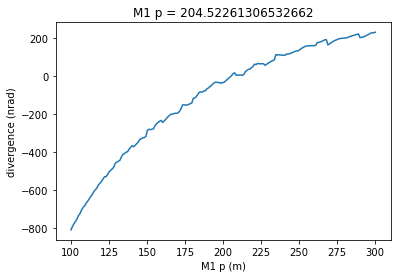

In [6]:
##### perfect collimation
result = m1_p[np.where(divergence<0)[0][-1]]

plt.figure()
plt.plot(m1_p, divergence*1e9)
plt.xlabel('M1 p (m)')
plt.ylabel('divergence (nrad)')
# plt.ylim([-30000, 30000])
plt.title('M1 p = {}'.format(result))



In [7]:
import winsound
winsound.Beep(1500, 3000)